# Sales Data Analysis

This notebook analyzes sales data from a CSV file, performing data cleaning, analysis, and visualization.


In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Task 1
file_path = 'SalesDataCSV.csv'
sales_data = pd.read_csv(r"C:\Users\Marc Jay Magan\Desktop\PROJECTS\BSIT 3-A\IT322_BSIT3A_Act1_MaganMJ\SalesDataCSV.csv")
print("Dataset Loaded Successfully!")
print(sales_data.head())

Dataset Loaded Successfully!
   Order ID        Date       Product     Category  Quantity  Price   Total
0      1001  2023-01-15        Laptop  Electronics       2.0  800.0  1600.0
1      1002  2023-01-16          Sofa    Furniture       1.0  450.0   450.0
2      1003  2023-01-17       T-Shirt     Clothing       5.0   25.0   125.0
3      1004  2023-01-18    Smartphone  Electronics       1.0    NaN   700.0
4      1005  2023-01-19  Dining Table    Furniture       NaN  300.0     NaN


In [4]:
# Check for missing values
missing_values = sales_data.isnull().sum()
missing_values

# Fill missing values in 'Total' with the mean of that column if any
sales_data['Total'].fillna(sales_data['Total'].mean(), inplace=True)

# Strip extra spaces from column names
sales_data.columns = sales_data.columns.str.strip()

# Convert 'Date' to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

C:\Users\Marc Jay Magan\AppData\Local\Temp\ipykernel_6668\646987514.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Total'].fillna(sales_data['Total'].mean(), inplace=True)


In [5]:
# Calculate total sales for each product
total_sales_per_product = sales_data.groupby('Product')['Total'].sum().reset_index()

# Determine the top 5 products with the highest sales
top_5_products = total_sales_per_product.nlargest(5, 'Total')
top_5_products

,Product,Total
9,Laptop,1600.000000
13,Smartphone,700.000000
14,Sofa,450.000000
0,Bed,437.368421
1,Bookshelf,437.368421


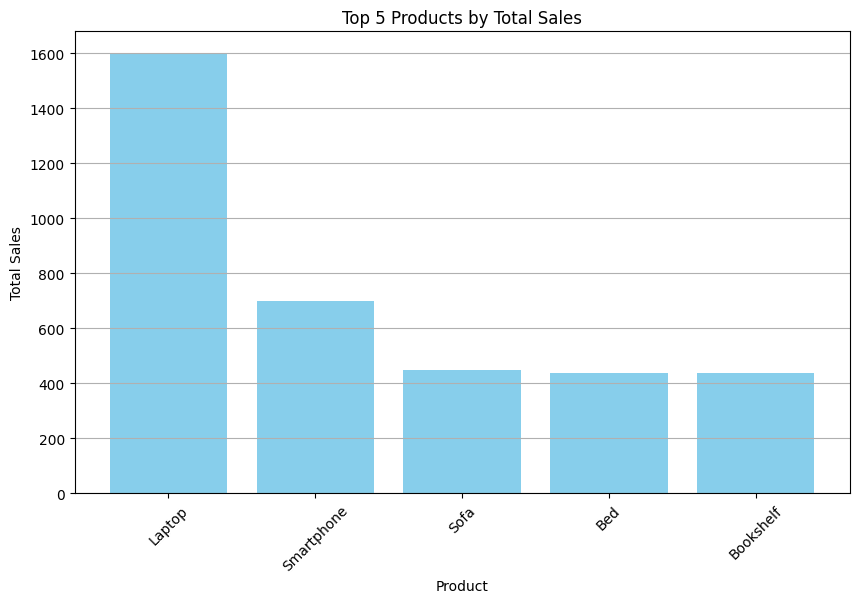

In [6]:
# Bar chart for total sales per product
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['Product'], top_5_products['Total'], color='skyblue')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

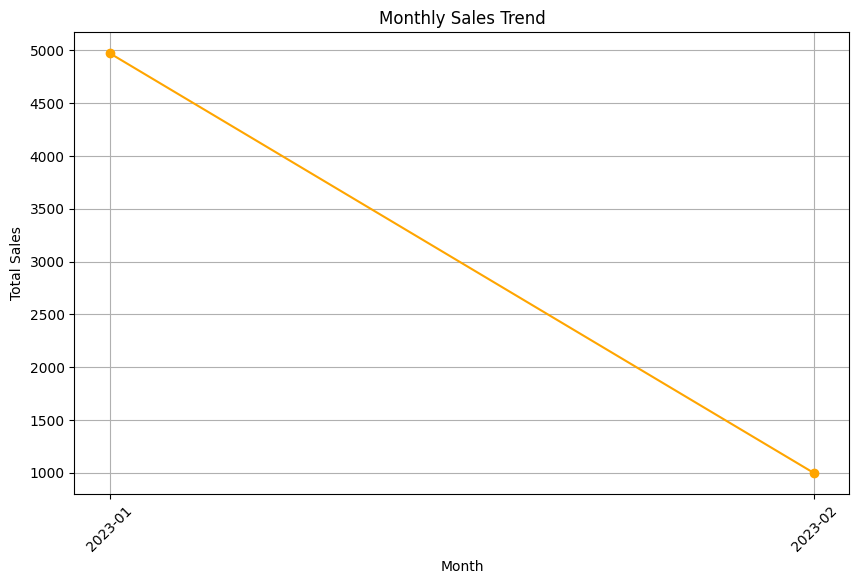

In [7]:
# Extract month for monthly sales trend
sales_data['Month'] = sales_data['Date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = sales_data.groupby('Month')['Total'].sum().reset_index()

# Line chart for monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Total'], marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()